<a href="https://colab.research.google.com/github/rghimre3/INFO5505_Machine_Learning_for_Data_Scientist/blob/main/Ghimire_ramesh_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Classification with Naive Bayes

Assignment description: TextClassificationwithNaive Bayes.docxDownload TextClassificationwithNaive Bayes.docx

Data set: all_sentiment_shuffled.rtf

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import 
from sklearn.model_selection import cross_val_score



In [ ]:
#reading the data from gitlab
df=pd.read_csv("https://raw.githubusercontent.com/rghimre3/INFO5505_Machine_Learning_for_Data_Scientist/main/data-breastCancer.csv")


In [ ]:
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df = df.drop(df.columns[-1], axis=1)
df.drop(['id'], axis = 1, inplace = True)

In [ ]:
df.shape

(569, 31)

In [ ]:


print(df.describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
counts = df['diagnosis'].value_counts()

In [ ]:
print(counts)

1    357
0    212
Name: diagnosis, dtype: int64


Text(0, 0.5, 'Count')

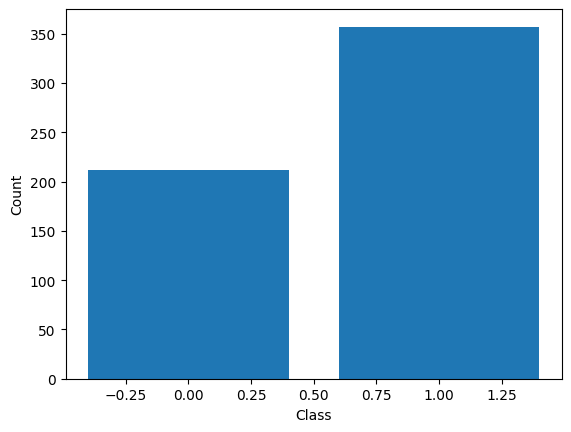

In [ ]:
plt.bar(counts.index, counts.values)
plt.xlabel('Class')
plt.ylabel('Count')

In [ ]:
#Encoding Male and Female to 1 and 0
df['diagnosis_0_1'] = df['diagnosis'].map({'M': 0, 'B': 1})


In [ ]:
df.drop(['diagnosis'], axis = 1, inplace = True)

In [ ]:
df = df.rename(columns={'diagnosis_0_1': 'diagnosis'})

In [ ]:
df['diagnosis']=df['diagnosis'].astype('int')

In [ ]:
df.head(20)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


In [ ]:
Y=df['diagnosis']

In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [ ]:

X= df.drop(df.columns[-1], axis=1)

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#splitting the data into 80 train and 20 test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.2, random_state=20)


In [ ]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
412,9.397,21.68,59.75,268.8,0.07969,0.06053,0.03735,0.005128,0.1274,0.06724,...,9.965,27.99,66.61,301.0,0.1086,0.1887,0.1868,0.02564,0.2376,0.09206
461,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.168900,0.2061,0.05623,...,36.040,31.37,251.20,4254.0,0.1357,0.4256,0.6833,0.26250,0.2641,0.07427
532,13.680,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.018800,0.1631,0.06155,...,15.850,20.20,101.60,773.4,0.1264,0.1564,0.1206,0.08704,0.2806,0.07782
495,14.870,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.049510,0.1487,0.05748,...,16.010,28.48,103.90,783.6,0.1216,0.1388,0.1700,0.10170,0.2369,0.06599
13,15.850,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.053640,0.1847,0.05338,...,16.840,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287


In [ ]:
#running the randomforest classfier on training date 

my_model = RandomForestClassifier(n_estimators = 10, random_state=30)

randf = my_model.fit(x_train, y_train)
randf


RandomForestClassifier(n_estimators=10, random_state=30)

In [ ]:
y_pred = my_model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1])

In [ ]:
y_pred_train = my_model.predict(x_train)
y_pred_train

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [ ]:
# 10 fold cross validation for train data

scores = cross_val_score(my_model, x_train, y_train, scoring = 'r2', cv = 10)
scores

array([0.61666667, 0.62677485, 1.        , 0.81338742, 0.62677485,
       0.70905172, 0.90301724, 0.51508621, 0.90301724, 0.90301724])

In [ ]:
print(np.mean(scores))

0.7616793441514537


In [ ]:
# 10 fold cross validation for test data
scores_test = cross_val_score(my_model, x_test, y_test, scoring = 'r2', cv = 10)
scores_test

array([ 0.65714286,  1.        ,  0.65714286,  0.65714286,  1.        ,
        1.        ,  1.        ,  1.        , -0.1       ,  1.        ])

In [ ]:
#the average score for test 

print(np.mean(scores_test))

0.7871428571428571


In [ ]:
# confusion matrix 


cm = confusion_matrix(y_pred, y_test)
cm

array([[45,  2],
       [ 3, 64]])

In [ ]:
acc_score=accuracy_score(y_pred, y_test)
acc_score

0.956140350877193

In [ ]:

#roc curve 

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

0.9952330064537759

In [ ]:

#prediction probability 
rf_prob = randf.predict_proba(x_test)
rf_prob = rf_prob[:,1]
rf_prob

array([1. , 0.5, 0. , 1. , 0.1, 0. , 0. , 1. , 0.8, 0. , 0. , 1. , 1. ,
       0. , 0.9, 0.6, 1. , 0.6, 0. , 0.7, 1. , 1. , 0.2, 0.1, 0. , 0. ,
       0.3, 1. , 0.8, 1. , 0.8, 1. , 0. , 1. , 0.1, 0. , 0. , 1. , 0. ,
       1. , 0. , 1. , 1. , 1. , 0. , 0.9, 0.9, 1. , 1. , 0. , 1. , 1. ,
       0. , 1. , 0.5, 1. , 1. , 1. , 0.9, 1. , 1. , 1. , 1. , 1. , 0.1,
       1. , 0. , 1. , 1. , 0. , 0.3, 0. , 0. , 1. , 0.9, 0. , 0. , 0.2,
       0. , 0.4, 1. , 0.4, 1. , 1. , 1. , 0.1, 1. , 0.9, 1. , 1. , 1. ,
       0. , 1. , 1. , 0. , 0.7, 0.5, 0.8, 0.7, 0.7, 1. , 0. , 0.1, 0. ,
       1. , 1. , 0. , 0. , 1. , 0. , 1. , 0.9, 0.3, 1. ])

In [ ]:
#computing AUROC 

rf_auc = roc_auc_score(y_test, rf_prob)
rf_auc

0.9943181818181818

In [ ]:
rf_fpr, rf_tpr,_=roc_curve(y_test, rf_prob)

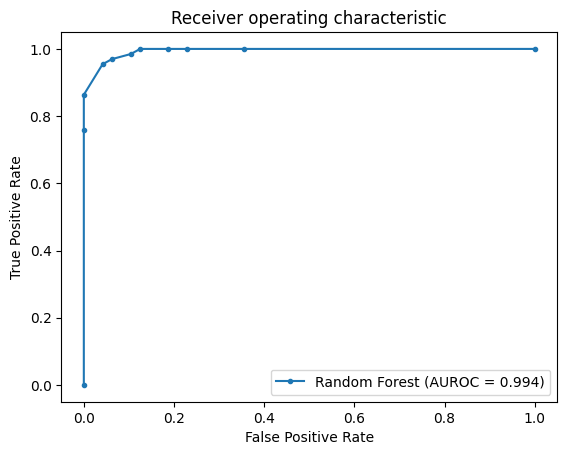

In [ ]:
plt.plot(rf_fpr, rf_tpr, marker = '.', label ='Random Forest (AUROC = %0.3f)'% rf_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()